In [107]:
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import advertools
import re
import seaborn as sns
from wordcloud import STOPWORDS, WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download("wordnet")
nltk.download("stopwords")
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to C:\Users\Ali
[nltk_data]     Haider\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ali
[nltk_data]     Haider\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
data_path = Path.cwd().parent/"Data"
final_data = pd.DataFrame()

In [100]:
for child in data_path.iterdir():
    for child_ch in child.iterdir():
        if child_ch.is_dir():
            files = list(child_ch.glob("**/*.csv"))
            for fls in tqdm(range(len(files))):
                df = pd.read_csv(files[fls])
        else:
            df = pd.read_csv(child_ch)
        final_data = pd.concat([df,final_data],axis = 0)

100%|██████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 49.67it/s]


In [108]:
def clean_text(text:str) -> str:
    tokens = advertools.word_tokenize(text,phrase_len=1)
    emoji_token = advertools.extract_emoji(tokens[0])
    emoji_token = emoji_token["emoji_text"]
    for tok in range(0,len(emoji_token)):
        if emoji_token[tok]:
            tokens[0][tok] = " ".join(emoji_token[tok])
    clean_text = " ".join(tokens[0])
    clean_pattern = r"@\w+|#\w+|\W+|x+|https\.\//www\.(\w+|\W+)\.com|http\w*|www\.(\w+|\W+)\.com|user\w*|\d+"
    clean_text = re.sub(clean_pattern," ",clean_text).strip()
    clean_text = re.sub(r"\s+"," ",clean_text).strip()
    return clean_text

In [109]:
def remove_stopword(text: str) -> str:
    tokens = advertools.word_tokenize(text,phrase_len=1)[0]
    stop_words = stopwords.words("english")
    clean_word = [tok for tok in tokens if tok not in stop_words]
    return " ".join(clean_word)

In [110]:
def text_lemmatize(text: str) -> str:
    lemma = WordNetLemmatizer()
    tokens = advertools.word_tokenize(text,phrase_len=1)
    text = [lemma.lemmatize(tok) for tok in tokens[0]]
    return " ".join(text)

In [111]:
def remove_stopword(text: str) -> str:
    tokens = advertools.word_tokenize(text,phrase_len=1)[0]
    stop_words = stopwords.words("english")
    clean_word = [tok for tok in tokens if tok not in stop_words]
    return " ".join(clean_word)

In [112]:
final_data.head()

,class,tweet_id,day,time,tweet,tweet_favorite_count,tweet_retweet_count,tweet_source,user_id,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
0,SCHIZOPHRENIA,1551565717530677251,2022-07-25,13:51:08,"""Sally 🤍🤍 we wont forget Angel. HTTPURL""",2,0,Twitter for iPad,2959315666,466,845,4,4636
1,SCHIZOPHRENIA,1551347384281604096,2022-07-24,23:23:33,"""@USER Personally my life is split in two, eve...",0,0,Twitter for iPad,2959315666,466,845,4,4636
2,SCHIZOPHRENIA,1547390686554689536,2022-07-14,01:21:03,"""@USER I can envisage your sufferance look sur...",1,0,Twitter for iPad,2959315666,466,845,4,4636
3,SCHIZOPHRENIA,1547378276750032896,2022-07-14,00:31:44,"""@USER @USER If you just take more responsibil...",2,0,Twitter for iPad,2959315666,466,845,4,4636
4,SCHIZOPHRENIA,1546969720578097152,2022-07-12,21:28:17,"""@USER Im so sorry, so angry and so want to sl...",1,0,Twitter for iPad,2959315666,466,845,4,4636


In [72]:
tweet_corpus = final_data.tweet.values.tolist()
emoji_frequency = []
emoji_groups = []
emoji_subgroups = []

for text in tqdm(range(len(tweet_corpus))):
    corpus_tokens = advertools.word_tokenize(tweet_corpus[text],phrase_len=1)[0]
    extract_emojis = advertools.extract_emoji(corpus_tokens)
    if extract_emojis["emoji_flat"]:
        emoji_frequency.extend(extract_emojis["emoji_flat"])
        emoji_subgroups.append(extract_emojis["top_emoji_sub_groups"].pop()[0])
        emoji_groups.append(extract_emojis["top_emoji_groups"].pop()[0])

100%|███████████████████████████████████████████████████████████████| 20869/20869 [00:55<00:00, 378.67it/s]


In [73]:
from collections import Counter

In [74]:
sort_emoji_frequency = dict(sorted(Counter(emoji_frequency).items(), key=lambda item: item[1], reverse=True))
sort_emoji_groups = dict(sorted(Counter(emoji_groups).items(), key=lambda item: item[1], reverse=True))
sort_emoji_subgroups = dict(sorted(Counter(emoji_subgroups).items(), key=lambda item: item[1], reverse=True))

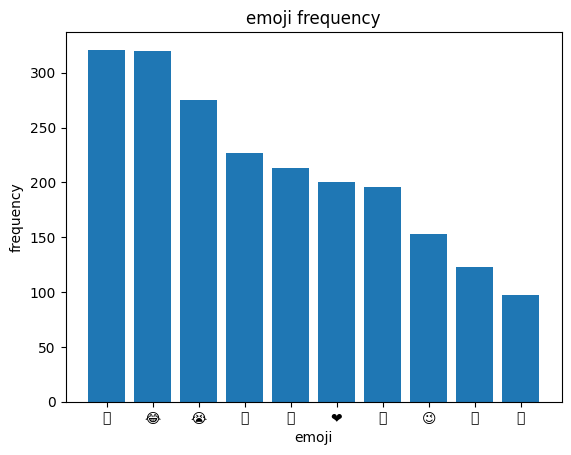

In [75]:
plt.title("emoji frequency")
plt.bar(list(sort_emoji_frequency.keys())[:10],list(sort_emoji_frequency.values())[:10])
plt.xlabel("emoji")
plt.ylabel("frequency")
plt.show()

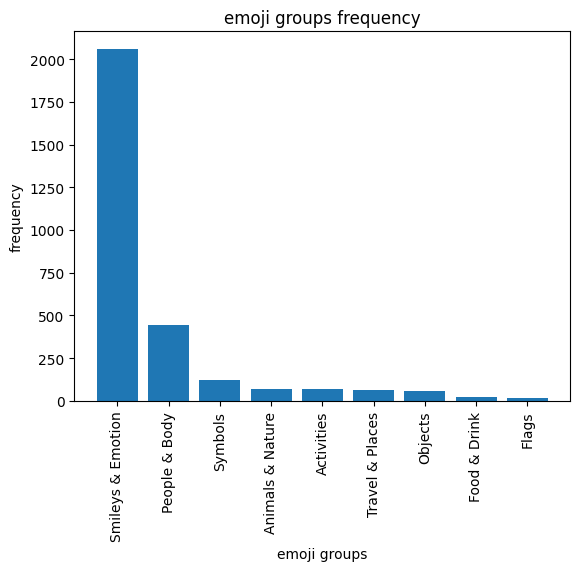

In [76]:
plt.title("emoji groups frequency")
plt.bar(list(sort_emoji_groups.keys())[:10],list(sort_emoji_groups.values())[:10])
plt.xlabel("emoji groups")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

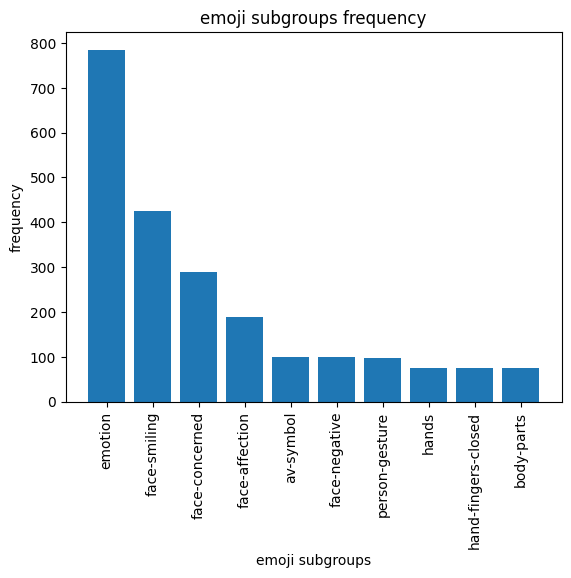

In [77]:
plt.title("emoji subgroups frequency")
plt.bar(list(sort_emoji_subgroups.keys())[:10],list(sort_emoji_subgroups.values())[:10])
plt.xlabel("emoji subgroups")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

In [113]:
def data_preprocess_pipeline(data_preprocess: pd.DataFrame,
                            ) -> pd.DataFrame:
    data_preprocess = data_preprocess[~(data_preprocess["tweet"].isnull())]
    data_preprocess = data_preprocess[["class","tweet"]]
    data_preprocess.rename(columns={"class":"Disorder"}, inplace=True)
    data_preprocess["tweet"] = data_preprocess["tweet"].apply(clean_text)
    data_preprocess["tweet"] = data_preprocess["tweet"].apply(text_lemmatize)
    data_preprocess["tweet"] = data_preprocess["tweet"].apply(remove_stopword)
    data_preprocess = data_preprocess[data_preprocess["tweet"]!=""]
    # data_preprocess["text_features"] = data_preprocess["tweet"].apply(lambda text: 
    #                                                                   generate_n_grams(text,n=ngram_range))
    # print("saving preprocessed data")
    # data_preprocess.to_csv(filename,index=False)
    # print("data saved")
    return data_preprocess

In [114]:
data_preprocess = data_preprocess_pipeline(final_data)
data_preprocess.head()

,Disorder,tweet
0,SCHIZOPHRENIA,sally white heart white heart wont forget angel
1,SCHIZOPHRENIA,personally life split two everything psychosis...
2,SCHIZOPHRENIA,envisage sufferance look surfacing ridiculous ...
3,SCHIZOPHRENIA,take responsibility
4,SCHIZOPHRENIA,im sorry angry want slap psychologist wet mop ...


In [126]:
tweets = " ".join(data_preprocess.tweet.values.tolist())

In [124]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(tweets)

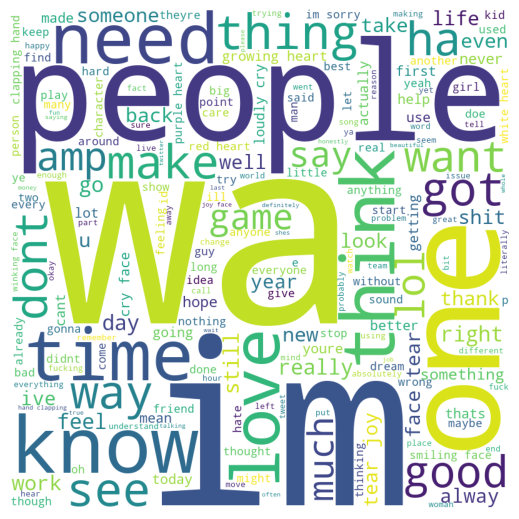

In [125]:
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [130]:
final_data["class"].unique()

array(['SCHIZOPHRENIA', 'PTSD', 'OCD', 'EATING DISORDER', 'DEPRESSION',
       'CONTROL', 'BIPOLAR', 'AUTISM', 'ANXIETY', 'ADHD'], dtype=object)

In [184]:
diagnosed_group = data_preprocess[data_preprocess["Disorder"]!="CONTROL"]
control_group = data_preprocess[data_preprocess["Disorder"]=="CONTROL"]
diagnosed_group.reset_index(drop=True, inplace=True)
diagnosed_group["Disorder"] = "DIAGNOSED"
diagnosed_control_group = pd.concat([diagnosed_group,control_group])

In [185]:
diagnosed_group["Disorder"].unique()

array(['DIAGNOSED'], dtype=object)

In [186]:
control_group["Disorder"].unique()

array(['CONTROL'], dtype=object)

In [187]:
diagnosed_control_group

,Disorder,tweet
0,DIAGNOSED,sally white heart white heart wont forget angel
1,DIAGNOSED,personally life split two everything psychosis...
2,DIAGNOSED,envisage sufferance look surfacing ridiculous ...
3,DIAGNOSED,take responsibility
4,DIAGNOSED,im sorry angry want slap psychologist wet mop ...
...,...,...
2527,CONTROL,winner didnt back fraud
2528,CONTROL,rodris mid
2529,CONTROL,sa goat
2530,CONTROL,dry eye


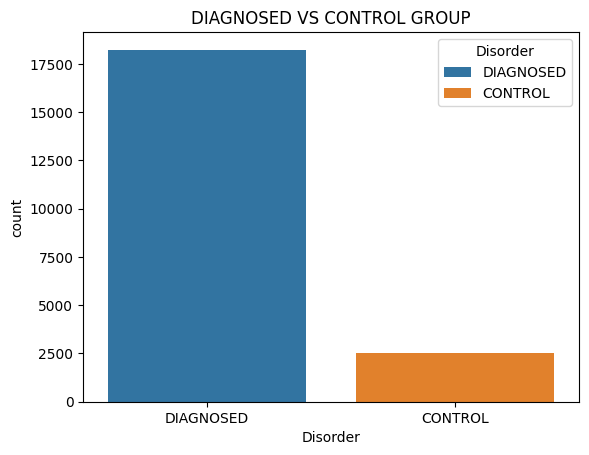

In [188]:
sns.countplot(diagnosed_control_group, x="Disorder",hue="Disorder", legend="full")
plt.title("DIAGNOSED VS CONTROL GROUP")
plt.show()

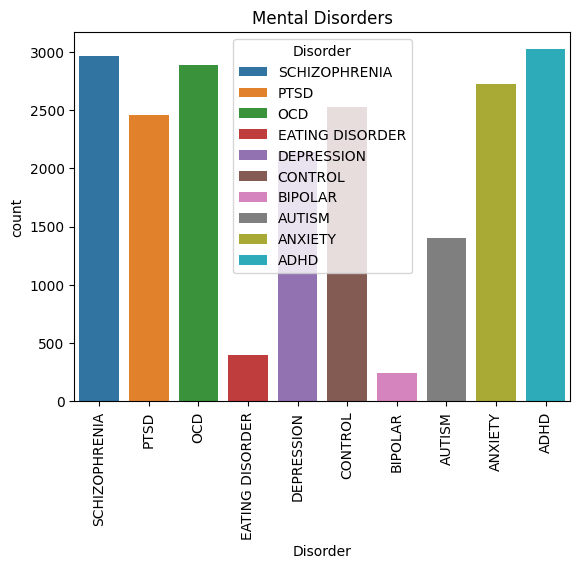

In [190]:
sns.countplot(data_preprocess, x="Disorder",hue="Disorder", legend="full")
plt.title("Mental Disorders")
plt.xticks(rotation=90) 
plt.show()

In [167]:
diagnosed_control_group.Disorder.value_counts()

Disorder
DIAGNOSED    18232
CONTROL       2526
Name: count, dtype: int64

In [194]:
data_preprocess.Disorder.value_counts()

Disorder
ADHD               3018
SCHIZOPHRENIA      2959
OCD                2888
ANXIETY            2719
CONTROL            2526
PTSD               2458
DEPRESSION         2143
AUTISM             1402
EATING DISORDER     402
BIPOLAR             243
Name: count, dtype: int64

In [168]:
diagnosed_control_group.shape

(20758, 2)

In [178]:
balanced_data = pd.read_csv("control_data.csv")
balanced_data.rename(columns={"Disorder":"class"}, inplace=True)
balanced_data.head()

,class,tweet
0,SCHIZOPHRENIA,"""@USER That feelingtake good care 💗xx"""
1,ADHD,"""@USER This had me belly laughing 😂"""
2,CONTROL,"""Solid tactics from Simeone."""
3,CONTROL,"3. ""Partey's control in the middle is unmatched."""
4,PTSD,"""Relationships where both people have conceale..."


In [179]:
balanced_preprocess_data = data_preprocess_pipeline(balanced_data)
balanced_preprocess_data.head()

,Disorder,tweet
0,SCHIZOPHRENIA,feelingtake good care growing heart
1,ADHD,belly laughing face tear joy
2,CONTROL,solid tactic simeone
3,CONTROL,partey control middle unmatched
4,PTSD,relationship people concealed motif aware othe...


In [180]:
diagnosed_group = balanced_preprocess_data[balanced_preprocess_data["Disorder"]!="CONTROL"]
control_group = balanced_preprocess_data[balanced_preprocess_data["Disorder"]=="CONTROL"]
diagnosed_group.reset_index(drop=True, inplace=True)
diagnosed_group["Disorder"] = "DIAGNOSED"
diagnosed_control_group = pd.concat([diagnosed_group,control_group])

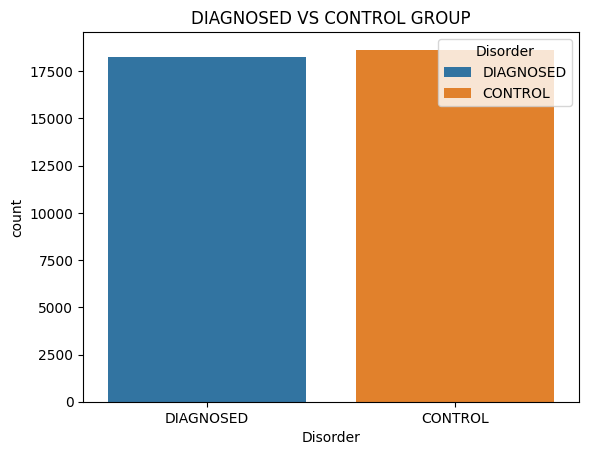

In [181]:
sns.countplot(diagnosed_control_group, x="Disorder",hue="Disorder", legend="full")
plt.title("DIAGNOSED VS CONTROL GROUP")
plt.show()

In [183]:
diagnosed_control_group.Disorder.value_counts()

Disorder
CONTROL      18640
DIAGNOSED    18232
Name: count, dtype: int64

In [197]:
balanced_multi_data = pd.read_csv("multi_class_data_balanced.csv")
balanced_multi_data.rename(columns={"class":"Disorder"}, inplace=True)
balanced_multi_data.head()

,Disorder,tweet
0,EATING DISORDER,"""Running always worked for improving my mood. ..."
1,OCD,"""@USER @USER I'd love to know this too. I hid ..."
2,EATING DISORDER,"53. ""What if I learned to appreciate the journ..."
3,PTSD,"""That applies to casual and poly/open relation..."
4,BIPOLAR,"35. ""If you could travel anywhere, where would..."


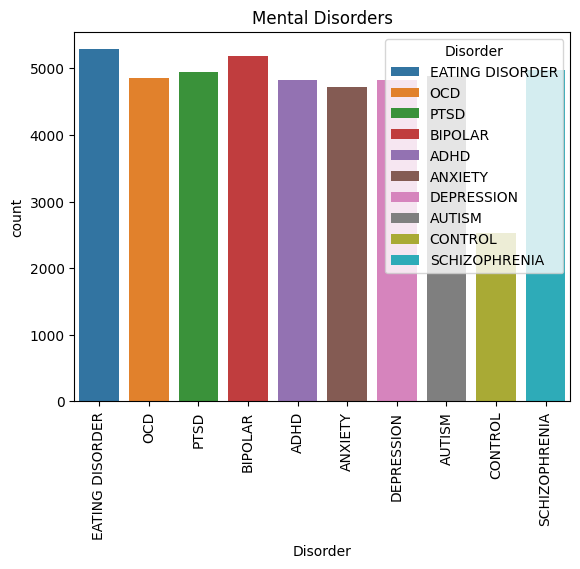

In [200]:
sns.countplot(balanced_multi_data, x="Disorder",hue="Disorder", legend="full")
plt.title("Mental Disorders")
plt.xticks(rotation=90)
plt.show()